In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class station():
    def __init__(self, ct):
        self.wip = 0
        self.finish = 0
        self.cycle_time = ct
        self.output = 0
    def add_wip(self, i):
        self.wip += i
    def work(self):
        if self.wip >= 1/self.cycle_time:
            self.finish += 1/self.cycle_time
        if self.finish >= 1:
            self.output = math.floor(self.finish)
            self.finish -= self.output
            self.wip -= self.output
    def out(self):
        output = self.output
        self.output = 0
        return output
time=[]
s0_wip=[]
s1_wip=[]
s2_wip=[]
s3_wip=[]
total=[]
finished=[]
state=[]
when_finish=[]
    
def simulate(t0, t1, t2, t3, hours, threshold, target, mode, start):
            #工作站0的CT,工作站1的CT,工作站2的CT,工作站3的CT,總時長, WIP上限, 目標產量, push(0)/pull(1), 拉式生產什麼時候開始往第一個工作站(工作站0)投料
    s0 = station(t0)
    s1 = station(t1)
    s2 = station(t2)
    s3 = station(t3)
    finish = 0
    round = 0
    total_wip = 0
    lead_time = 0
    supplement_time=[]
  
    if(mode == 1):#PULL
      supplement_time=[]
      for i in range(start,hours):
        if (i - start) % t2 == 0:
          supplement_time.append(i)
        if len(supplement_time)==target:
          break
    while (1):
        if(mode == 0):#PUSH:
          if s0.wip == 0 and total_wip<threshold :
            s0.add_wip(1)
        elif(mode == 1):#PULL:
          if round in supplement_time and total_wip<threshold:
            s0.add_wip(1)
        if (round == 0):
          print('Threshold:',threshold)
        s0.work()
        s1.work()
        s2.work()
        s3.work()
        s1.add_wip(s0.out())
        s2.add_wip(s1.out())
        s3.add_wip(s2.out())
        finish += s3.out()
        total_wip=s0.wip+s1.wip+s2.wip+s3.wip
        abnormal=''
        if total_wip > threshold:
          abnormal='異常'
        else:
          abnormal='正常'
        if(s3.out()==1):
          when_finish.append(round)
        time.append(round)
        s0_wip.append(s0.wip)
        s1_wip.append(s1.wip)
        s2_wip.append(s2.wip)
        s3_wip.append(s3.wip)
        total.append(total_wip)
        finished.append(finish)
        state.append(abnormal)
        print(":%d: s0:%d, s1:%d, s2:%d, s3:%d, finish:%d, total_wip:%d, state:%s"%(round ,s0.wip, s1.wip, s2.wip, s3.wip,finish,total_wip,abnormal))
        if (finish == target and lead_time == 0):
          lead_time = round
        if (round==hours):
            print('')
            break  
        round += 1   
    return finish, lead_time#總產出,達到目標產出的lead time
    
#定義參數
CT_0=2#工作站0 CT
CT_1=2#工作站1 CT
CT_2=6#工作站2 CT
CT_3=2#工作站3 CT
total_hours=40#總時長
WIP_max=20#WIP最大上限
targets=5#目標產出
start_push=0#因爲push是空了就補料，所以t=0就會開始投料（此項為常數）
start_pull=4#拉式生產什麼時候開始往第一個工作站(工作站0)投料

In [24]:
#推式生產
print('PUSH')
finish_push=[]
lead_time_push=[]
for i in range(WIP_max+1):
  finish,LT=simulate(CT_0,CT_1,CT_2,CT_3,total_hours,i,targets,0,start_push)#工作站0 CT,工作站1 CT,工作站2 CT,工作站3 CT,總時長, WIP上限, 目標產量, push(0)/pull(1), 拉是生產什麼時候開始往第一個工作站(工作站0)投料
  finish_push.append(finish)
  lead_time_push.append(LT)

PUSH
Threshold: 0
:0: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:1: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:2: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:3: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:4: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:5: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:6: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:7: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:8: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:9: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:10: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:11: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:12: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:13: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:14: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:15: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:16: s0:0, s1:0,

In [3]:
data={'s0_wip':s0_wip,'s1_wip':s1_wip,'s2_wip':s2_wip,'s3_wip':s3_wip,
        'total_wip':total,'finish':finished,'state':state,
}
df = pd.DataFrame(data)
df.to_csv('push.csv',encoding='utf_8_sig')

In [12]:
print(finish_push)
print(lead_time_push)

[0, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
[0, 0, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]


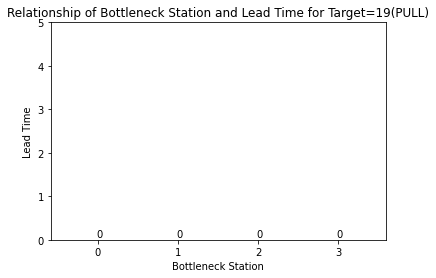

In [91]:
x=[0,1,2,3]
y=[0,0,0,0]
labels=['0','1','2','3']
plt.bar(x, y, color='yellowgreen', linewidth=2, edgecolor='white', tick_label=labels)
for x,y in zip(x,y):
    plt.text(x+0.02,y+0.01,y,ha='center',va='bottom')
plt.xlabel('Bottleneck Station')
plt.ylabel('Lead Time')
plt.ylim(0,5)
plt.title('Relationship of Bottleneck Station and Lead Time for Target=19(PULL)')
plt.show()

In [9]:
time=[]
s0_wip=[]
s1_wip=[]
s2_wip=[]
s3_wip=[]
total=[]
finished=[]
state=[]

In [25]:
#拉式生產
print('PULL')
finish_pull=[]
lead_time_pull=[]
for i in range(WIP_max+1):
  finish,LT=simulate(CT_0,CT_1,CT_2,CT_3,total_hours,i,targets,1,4)#工作站0 CT,工作站1 CT,工作站2 CT,工作站3 CT,總時長, WIP上限, 目標產量, push(0)/pull(1), 拉是生產什麼時候開始往第一個工作站(工作站0)投料
  finish_pull.append(finish)
  lead_time_pull.append(LT)

PULL
Threshold: 0
:0: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:1: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:2: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:3: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:4: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:5: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:6: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:7: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:8: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:9: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:10: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:11: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:12: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:13: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:14: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:15: s0:0, s1:0, s2:0, s3:0, finish:0, total_wip:0, state:正常
:16: s0:0, s1:0,

In [7]:
data={'s0_wip':s0_wip,'s1_wip':s1_wip,'s2_wip':s2_wip,'s3_wip':s3_wip,
        'total_wip':total,'finish':finished,'state':state,
}
df = pd.DataFrame(data)
df.to_csv('pull.csv',encoding='utf_8_sig')

In [5]:
print(finish_pull)#[0, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 19, 19, 19, 19]
print(lead_time_pull)

[0, 9, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
[0, 0, 0, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124]


In [ ]:
finish_pull=[0, 9, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]

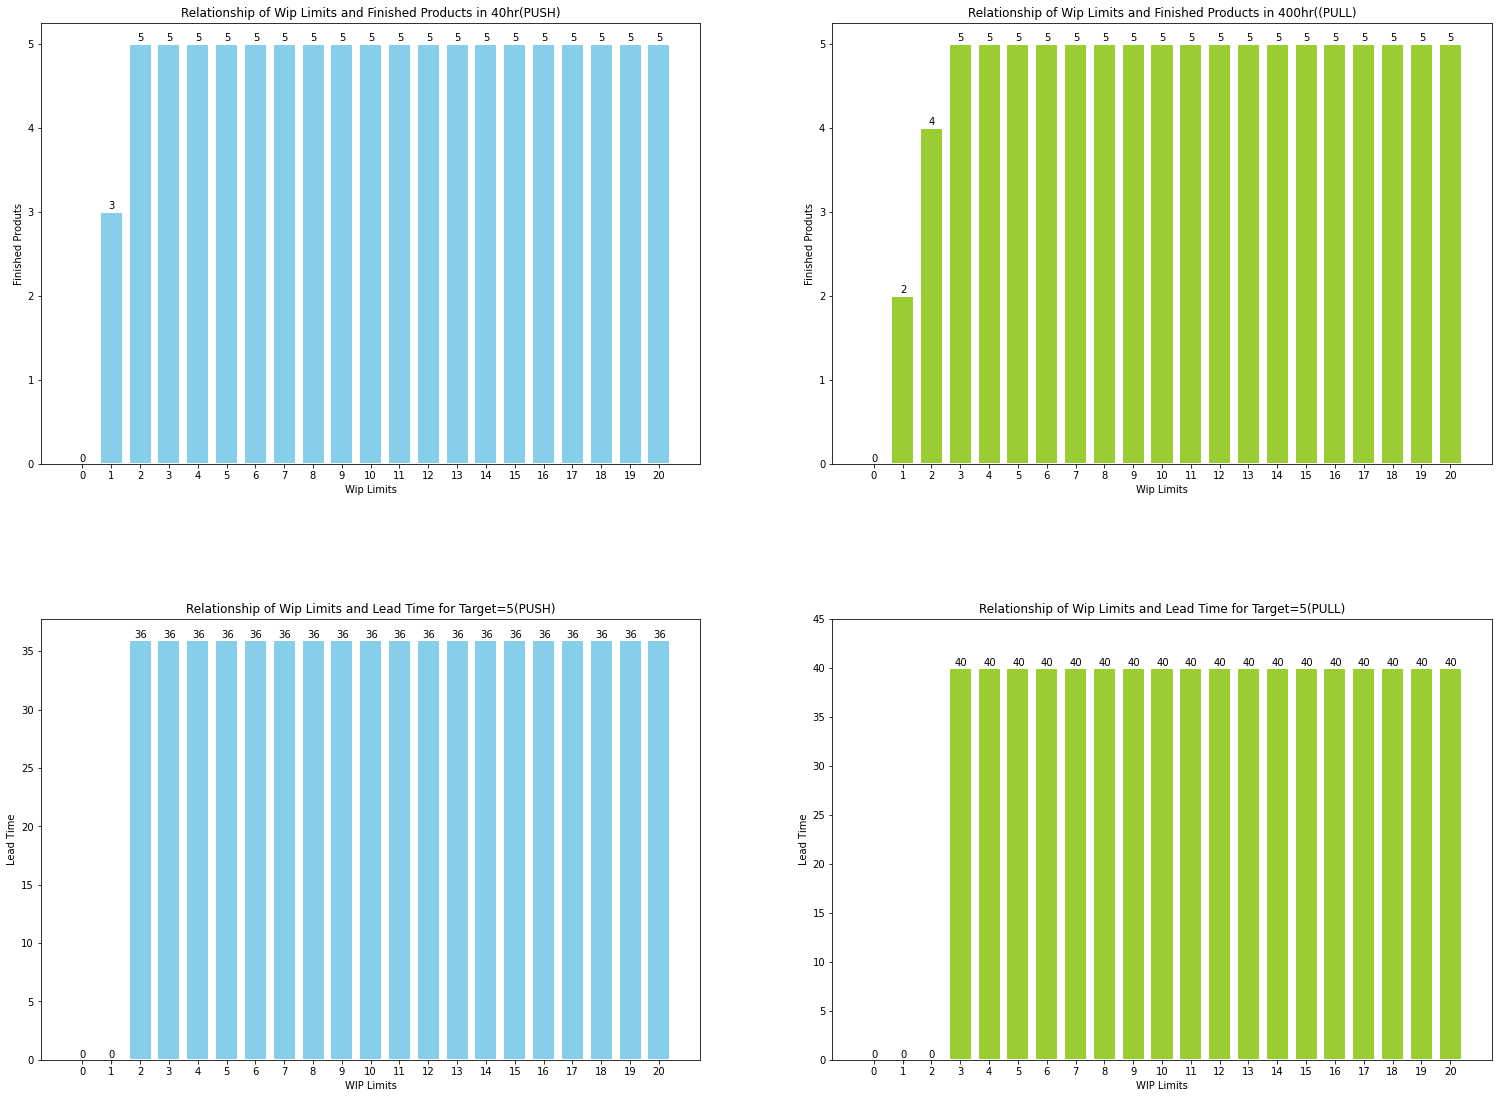

In [26]:
#定義畫圖函式
def plot_result(finish_list_push,lead_time_list_push,finish_list_pull,lead_time_list_pull,round,targets):
  labels =[]
  x1=[]
  x2=[]
  x3=[]
  x4=[]
  target=targets
  for i in range(round):
    labels.append(str(i))
    x1.append(i)
    x2.append(i)
    x3.append(i)
    x4.append(i)

  fig = plt.figure(figsize=(26,18))
  y1 = finish_list_push
  plt.subplot(2,2,1)
  plt.bar(x1, y1, color='skyblue', linewidth=2, edgecolor='white', tick_label=labels)
  for x,y in zip(x1,y1):
    plt.text(x+0.02,y+0.01,y,ha='center',va='bottom')
  plt.xlabel('Wip Limits')
  plt.ylabel('Finished Produts')
  plt.title('Relationship of Wip Limits and Finished Products in 40hr(PUSH)')

  y2 = lead_time_list_push
  plt.subplot(2,2,3)
  plt.bar(x2, y2, color='skyblue', linewidth=2, edgecolor='white', tick_label=labels)
  for x,y in zip(x2,y2):
    plt.text(x+0.02,y+0.01,y,ha='center',va='bottom')
  plt.xlabel('WIP Limits')
  plt.ylabel('Lead Time')
  y_major_locator=plt.MultipleLocator(5)
  ax=plt.gca()
  ax.yaxis.set_major_locator(y_major_locator)#把y軸的主刻度設置为6的倍数
  
 
  plt.title('Relationship of Wip Limits and Lead Time for Target='+str(target)+'(PUSH)')

  y3 = finish_list_pull
  plt.subplot(2,2,2)
  plt.bar(x3, y3, color='yellowgreen', linewidth=2, edgecolor='white', tick_label=labels)
  for x,y in zip(x3,y3):
    plt.text(x+0.02,y+0.01,y,ha='center',va='bottom')
  plt.xlabel('Wip Limits')
  plt.ylabel('Finished Produts')
  plt.title('Relationship of Wip Limits and Finished Products in 400hr((PULL)')

  y4 = lead_time_list_pull
  plt.subplot(2,2,4)
  plt.bar(x4, y4, color='yellowgreen', linewidth=2, edgecolor='white', tick_label=labels)
  for x,y in zip(x4,y4):
    plt.text(x+0.02,y+0.01,y,ha='center',va='bottom')
  plt.xlabel('WIP Limits')
  plt.ylabel('Lead Time')
  y_major_locator=plt.MultipleLocator(5)
  ax=plt.gca()
  ax.yaxis.set_major_locator(y_major_locator)#把y軸的主刻度設置为6的倍数
  max = y4[len(y4)-1]
  plt.ylim(0,max+5)
  plt.title('Relationship of Wip Limits and Lead Time for Target='+str(target)+'(PULL)')

  #調整每張圖的間距
  plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.35)
  plt.show()

#畫出結果
plot_result(finish_push,lead_time_push,finish_pull,lead_time_pull,WIP_max+1,targets) 